# Regressão Softmax com dados do MNIST

## Objetivo

O objetivo deste notebook é ilustrar o uso de praticamente a mesma rede desenvolvida para a classificação das flores Íris, porém agora com o problema de classificação de dígitos manuscritos utilizando o dataset MNIST.
As principais diferenças são:
- tipo do dado, agora imagem com muito atributos: 28 x 28 pixels
- número de amostras, muito maior, 60 mil
Neste exercício será possível a interpretação do significado dos parâmetros treinados

## Importação das bibliotecas

In [ ]:
! pip install Pillow

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable

import torchvision

## Carregamento dos dados do MNIST

In [ ]:
! git clone https://github.com/vcasadei/MNIST.git

Cloning into 'MNIST'...
remote: Enumerating objects: 10, done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 10 (from 1)
Receiving objects: 100% (10/10), 11.01 MiB | 16.83 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
!ls MNIST

processed  raw


In [ ]:
dataset_dir = 'MNIST/'

x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 60000

Dimensões dos dados das imagens:    torch.Size([60000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


<ipython-input-5-6143b94785d1>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')


### Carregamento, normalização e seleção dos dados do MNIST

Neste exemplo utilizaremos apenas 1000 amostras de treinamento.

In [ ]:
x_train = x_train.float()

x_train = x_train / 255.

if True:
    n_samples_train = 1000

    x_train = x_train[:n_samples_train]
    y_train = y_train[:n_samples_train]

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 1000

Dimensões dos dados das imagens:    torch.Size([1000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Visualizando os dados

(-0.5, 232.5, 87.5, -0.5)

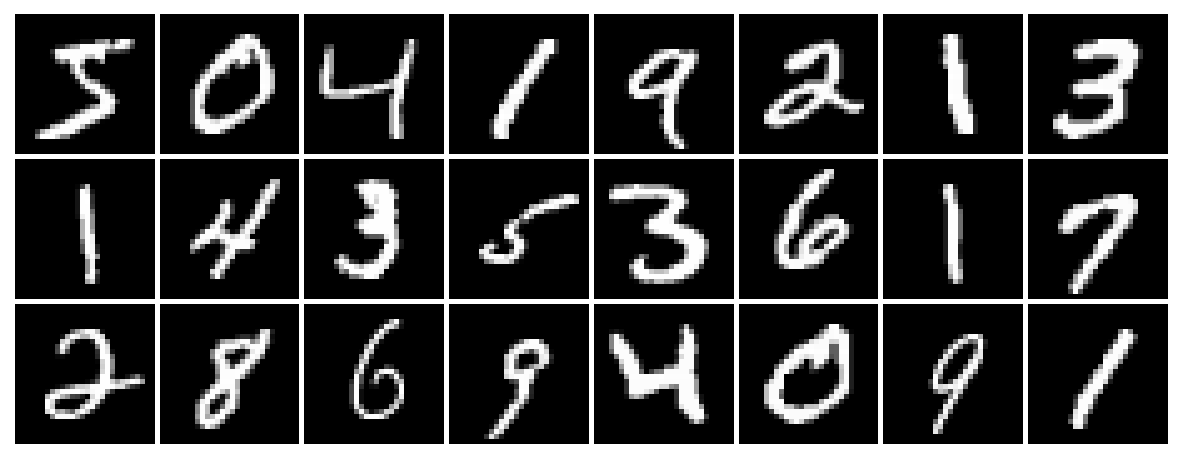

In [ ]:
n_samples = 24

# cria um grid com as imagens
grid = torchvision.utils.make_grid(x_train[:n_samples].unsqueeze(dim=1), pad_value=1.0, padding=1)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')

### Visualizando uma imagem com o matplotlib

In [ ]:
print(x_train[0])

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

class: tensor(5)


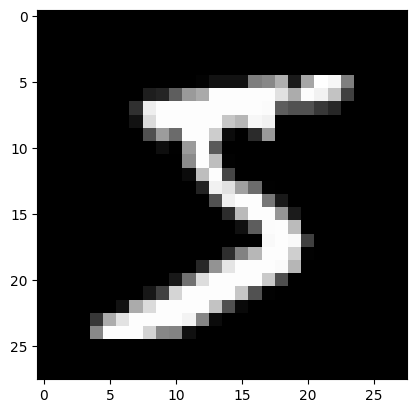

In [ ]:
image  = x_train[0]
target = y_train[0]

plt.imshow(image.numpy(), cmap='gray')
print('class:', target)

## Modelo

In [ ]:
model = torch.nn.Linear(28*28, 10) # 28*28 atributos de entrada e 10 neurônios na sáida

Perguntas 1,2 e 3

In [ ]:
print(f"Shape da matriz de entrada na rede: {x_train.size()}")  # [1000, 28, 28]

In [ ]:
x_train_flattened = x_train.view(-1, 28 * 28)
output_example = model(x_train_flattened)
print(f"Shape da saída da rede: {output_example.size()}")  # [1000, 10]

In [ ]:
total_params = (28 * 28) * 10 + 10  # Pesos + Bias
print(f"Número total de parâmetros (incluindo bias): {total_params}")

In [ ]:
model.state_dict()

OrderedDict([('weight',
              tensor([[-0.0315,  0.0153, -0.0121,  ...,  0.0020,  0.0350, -0.0128],
                      [-0.0139, -0.0220,  0.0211,  ..., -0.0299,  0.0096,  0.0253],
                      [ 0.0303, -0.0071, -0.0324,  ...,  0.0100,  0.0085,  0.0065],
                      ...,
                      [ 0.0122, -0.0143,  0.0029,  ..., -0.0110,  0.0291, -0.0045],
                      [ 0.0218,  0.0256,  0.0037,  ...,  0.0263,  0.0354, -0.0175],
                      [ 0.0319, -0.0212, -0.0240,  ...,  0.0322, -0.0016, -0.0153]])),
             ('bias',
              tensor([-0.0091,  0.0307,  0.0323, -0.0027, -0.0245,  0.0187, -0.0031, -0.0293,
                      -0.0212, -0.0230]))])

### Testando um predict com poucas amostras

In [ ]:
x_train[:1].view(-1,28*28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [ ]:
xin = x_train[:5].view(-1,28*28)
score = model(Variable(xin))
score

tensor([[ 0.0868,  0.1649,  0.0248, -0.2638,  0.0053, -0.1083,  0.2335, -0.0424,
         -0.4746, -0.1445],
        [ 0.1830,  0.4071,  0.0398, -0.2912, -0.0253, -0.1049,  0.2610, -0.3301,
         -0.3194, -0.0103],
        [ 0.3082, -0.1162, -0.1110,  0.0007, -0.2526, -0.1954,  0.1019,  0.0425,
         -0.0735, -0.0400],
        [-0.3624, -0.0089, -0.0033,  0.0296,  0.0576, -0.1319,  0.3408, -0.0372,
         -0.2149, -0.0974],
        [ 0.1280,  0.1197, -0.1701, -0.2353, -0.0310, -0.1638,  0.2550, -0.2575,
         -0.0906, -0.0924]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [ ]:
epochs = 100
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Visualização do grafo computacional da perda (loss)

In [ ]:
!pip install graphviz
!pip install git+https://github.com/szagoruyko/pytorchviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 995.8 kB/s eta 0:00:00
  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-req-build-p5d9pdom
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz /tmp/pip-req-build-p5d9pdom
  Resolved https://github.com/szagoruyko/pytorchviz to commit 0adcd83af8aa7ab36d6afd139cabbd9df598edb7
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4972 sha256=100f20be16d700c689ebcd2f78ca24ca7ea8f5f3985486618f21ae3e89cc08a0
  Stored in directory: /tmp/pip-ephem-wheel-cache-hf899_qy/wheels/44/5a/39/48c1209682afcfc7ad8ae7b3cf7aa0ff08a72e3ac4e5931f1d
Successfully built torchviz


In [ ]:
from torchviz import make_dot, make_dot_from_trace
y_pred = model(Variable(x_train.view(-1,28*28)))
loss = criterion(y_pred, Variable(y_train))
loss


tensor(2.3336, grad_fn=<NllLossBackward0>)

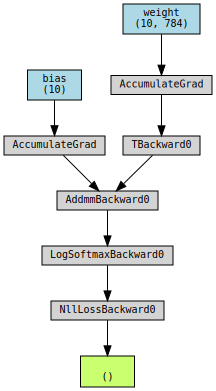

In [ ]:
p = make_dot(loss, dict(model.named_parameters()))
p

### Laço de treinamento dos pesos

Época 1: Perda = 2.333627462387085, Acurácia = 0.069


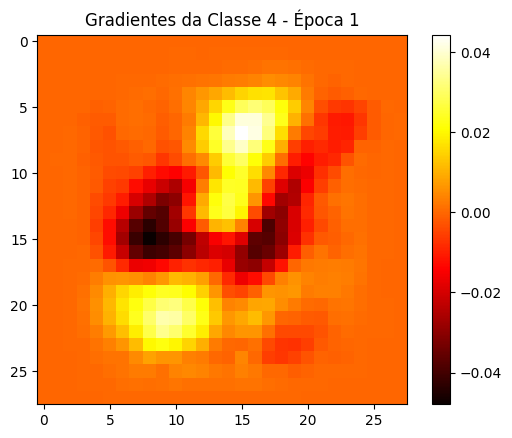

Época 2: Perda = 1.82709538936615, Acurácia = 0.587


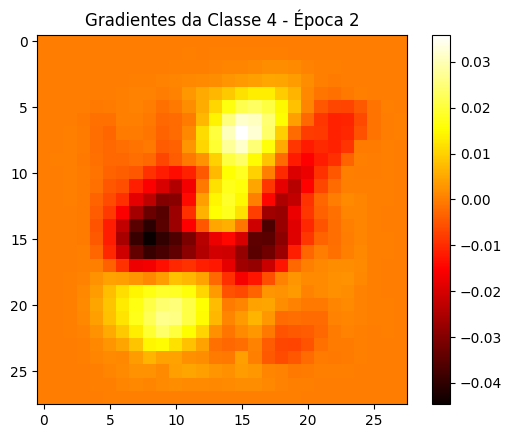

Época 3: Perda = 1.4855965375900269, Acurácia = 0.741


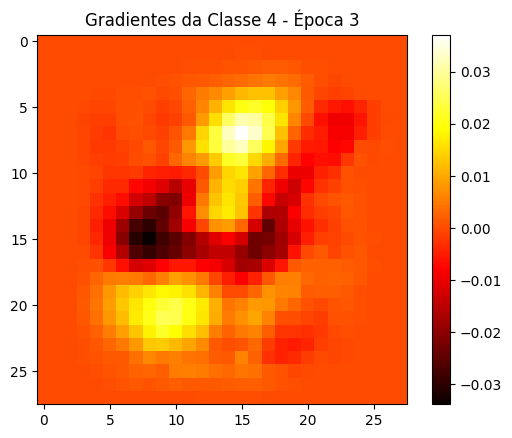

Época 4: Perda = 1.262130856513977, Acurácia = 0.785


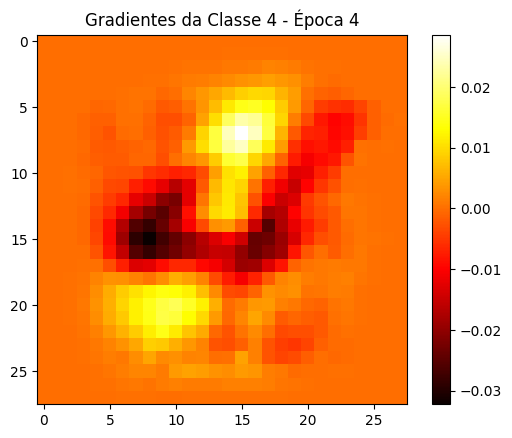

Época 5: Perda = 1.1084027290344238, Acurácia = 0.812


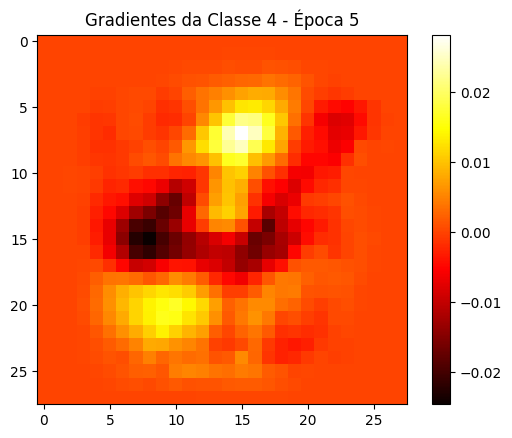

Época 6: Perda = 0.998367190361023, Acurácia = 0.818


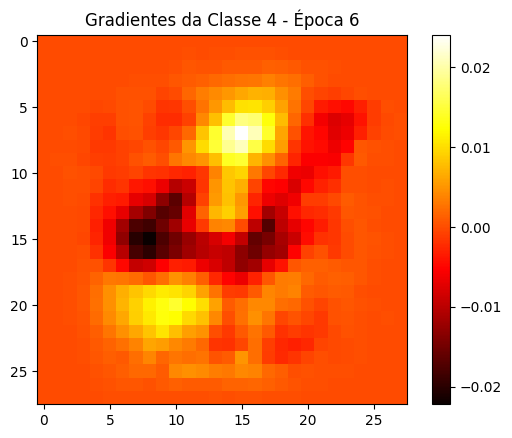

Época 7: Perda = 0.9164454936981201, Acurácia = 0.831


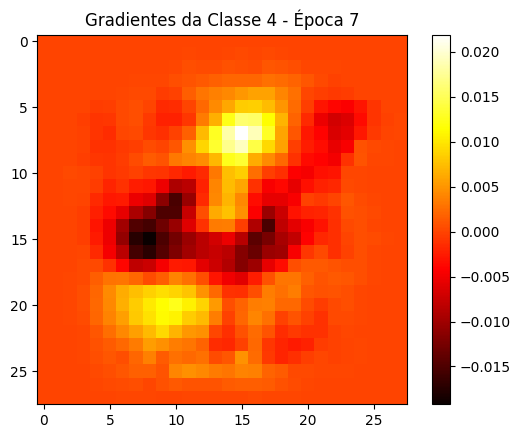

Época 8: Perda = 0.8530979156494141, Acurácia = 0.834


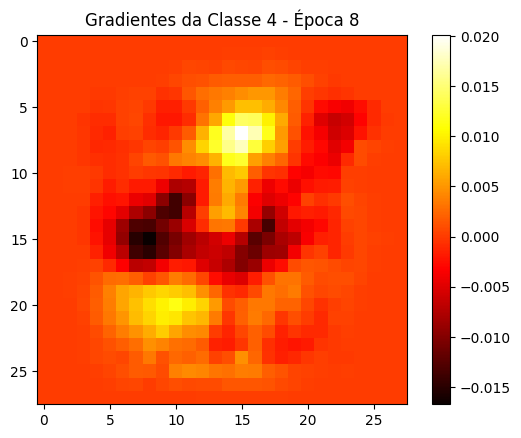

Época 9: Perda = 0.8023412227630615, Acurácia = 0.84


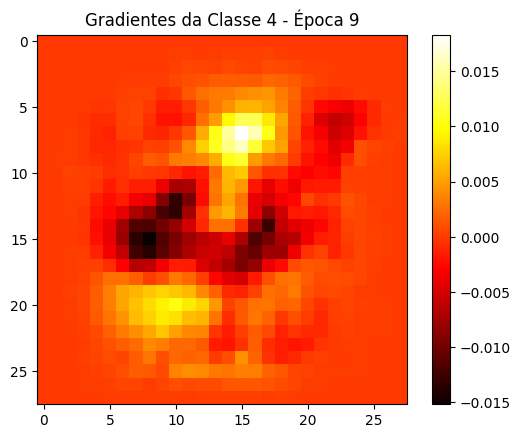

Época 10: Perda = 0.7605255246162415, Acurácia = 0.847


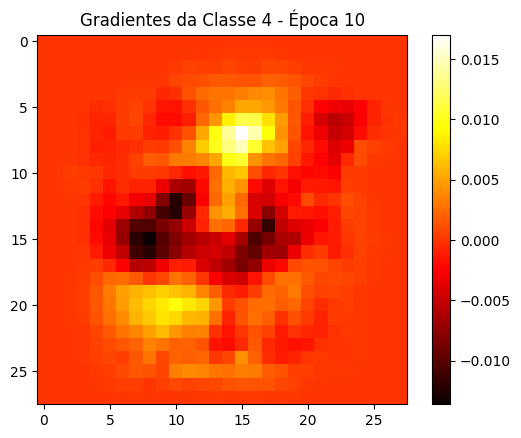

Época 11: Perda = 0.7253221273422241, Acurácia = 0.852


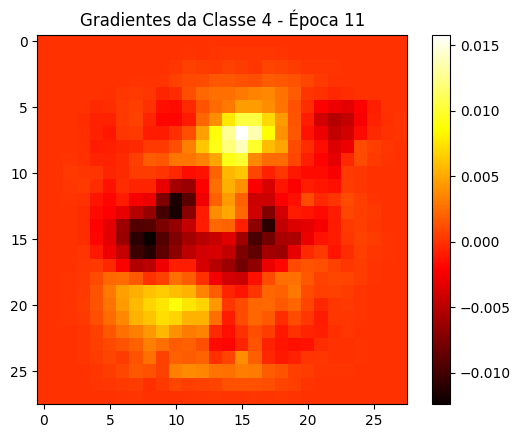

Época 12: Perda = 0.6951659917831421, Acurácia = 0.857


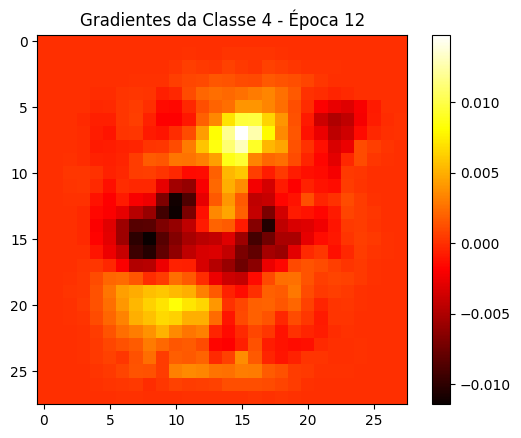

Época 13: Perda = 0.6689597368240356, Acurácia = 0.862


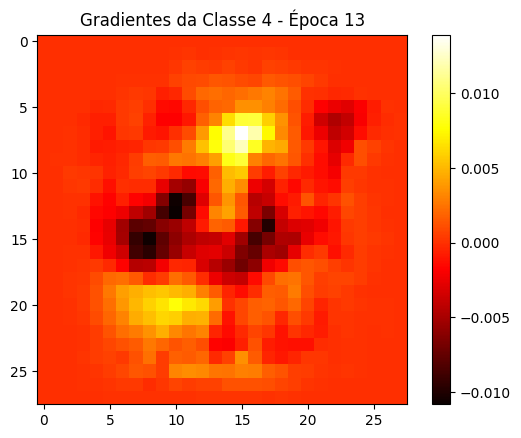

Época 14: Perda = 0.6459077596664429, Acurácia = 0.867


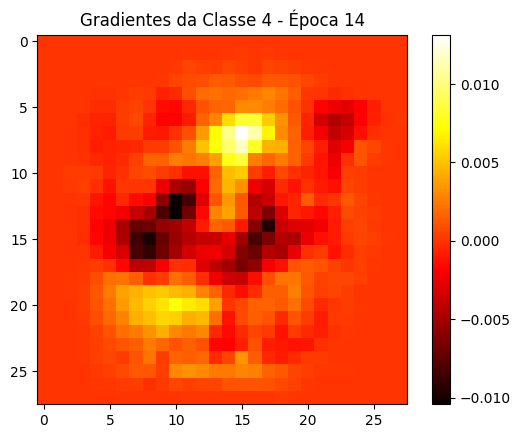

Época 15: Perda = 0.6254197359085083, Acurácia = 0.868


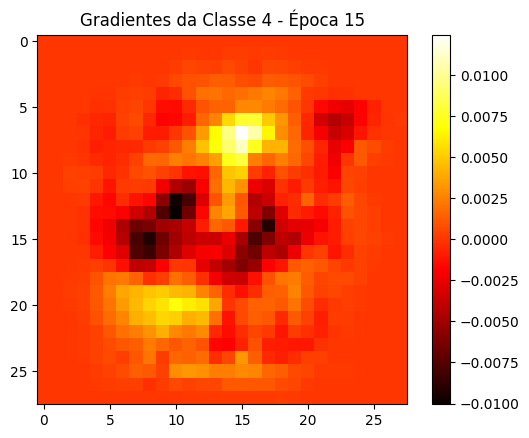

Época 16: Perda = 0.6070468425750732, Acurácia = 0.872


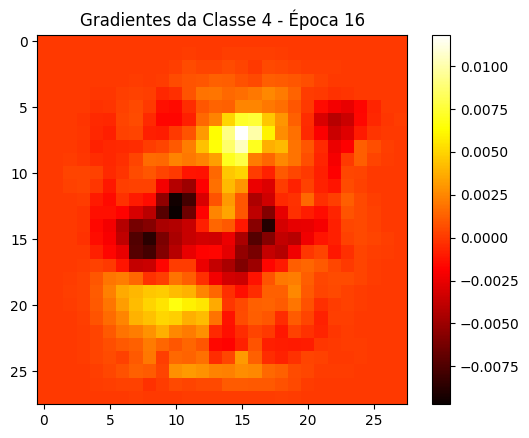

Época 17: Perda = 0.5904421806335449, Acurácia = 0.875


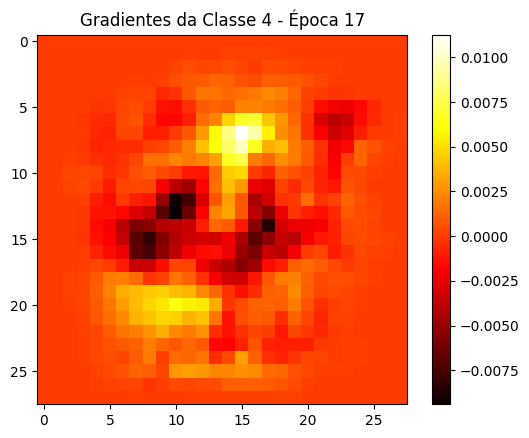

Época 18: Perda = 0.5753331184387207, Acurácia = 0.877


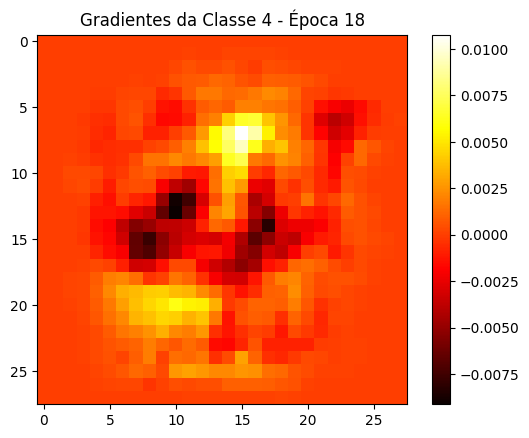

Época 19: Perda = 0.5615017414093018, Acurácia = 0.879


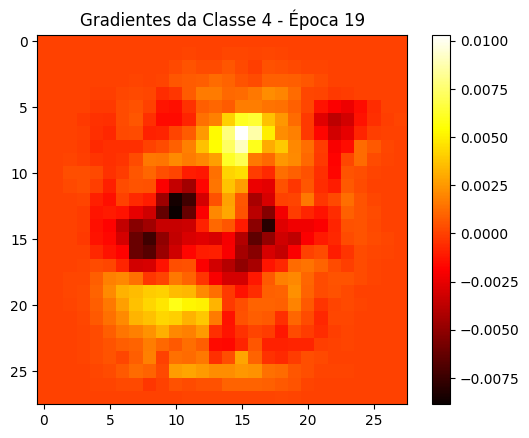

Época 20: Perda = 0.5487721562385559, Acurácia = 0.88


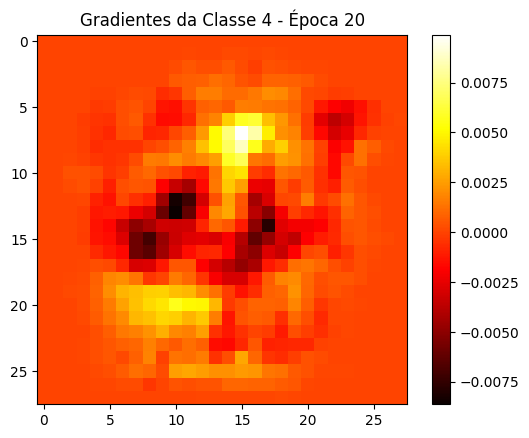

Época 21: Perda = 0.5370003581047058, Acurácia = 0.883


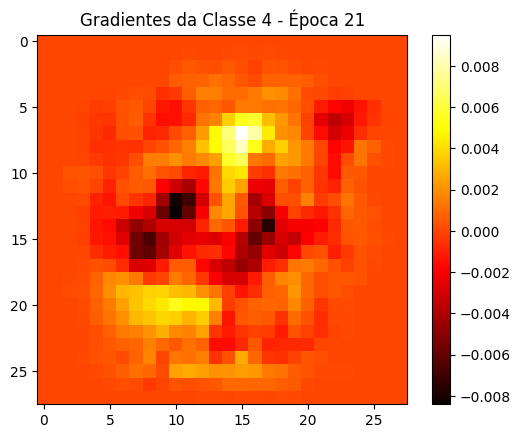

Época 22: Perda = 0.5260673761367798, Acurácia = 0.886


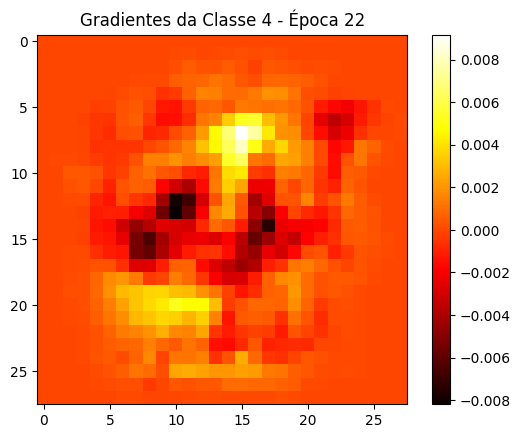

Época 23: Perda = 0.5158737301826477, Acurácia = 0.89


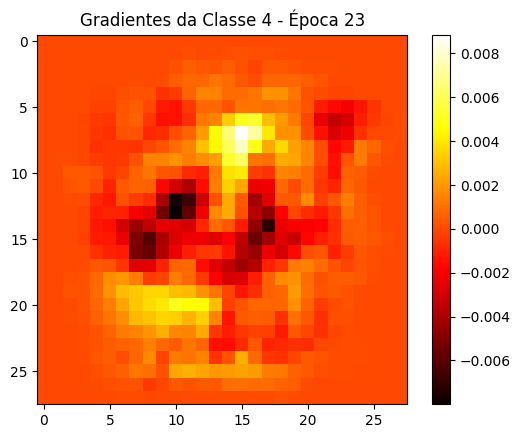

Época 24: Perda = 0.5063358545303345, Acurácia = 0.892


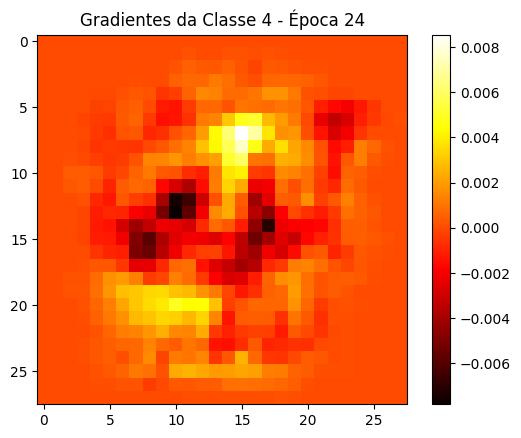

Época 25: Perda = 0.4973829984664917, Acurácia = 0.893


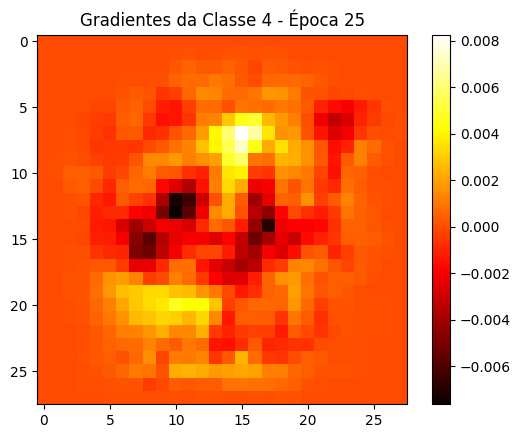

Época 26: Perda = 0.4889543652534485, Acurácia = 0.893


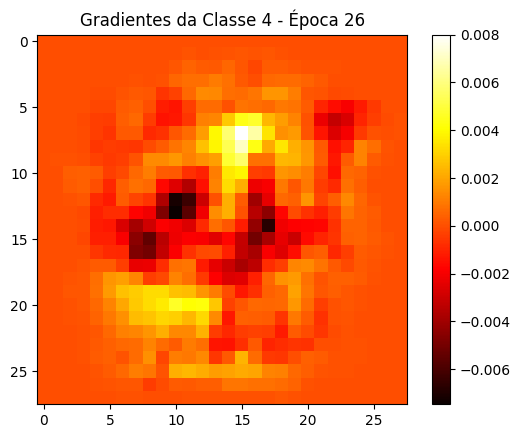

Época 27: Perda = 0.48099783062934875, Acurácia = 0.894


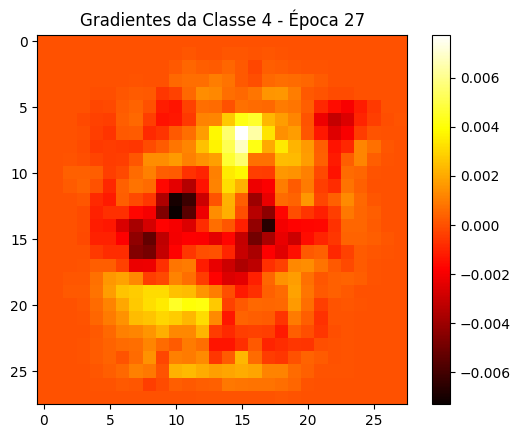

Época 28: Perda = 0.47346824407577515, Acurácia = 0.894


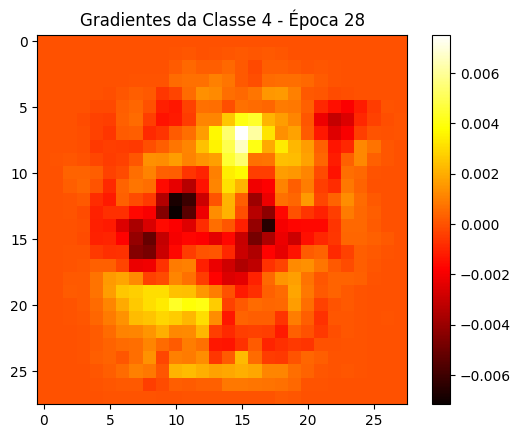

Época 29: Perda = 0.4663263261318207, Acurácia = 0.894


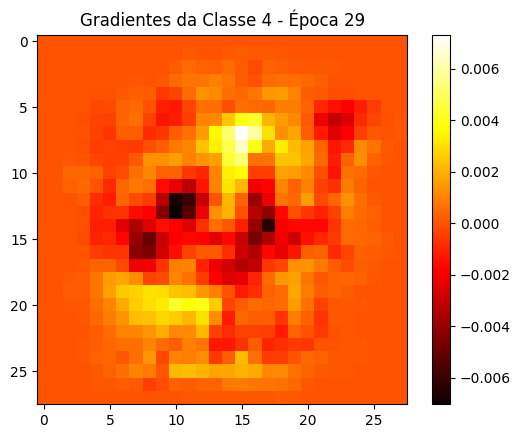

Época 30: Perda = 0.45953768491744995, Acurácia = 0.894


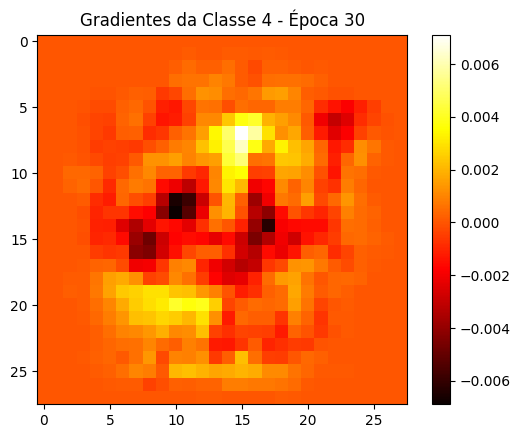

Época 31: Perda = 0.45307210087776184, Acurácia = 0.895


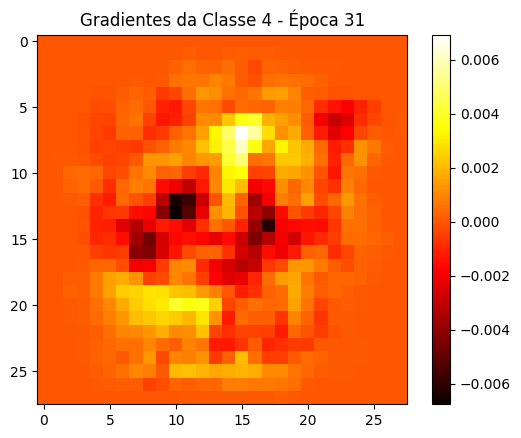

Época 32: Perda = 0.44690290093421936, Acurácia = 0.899


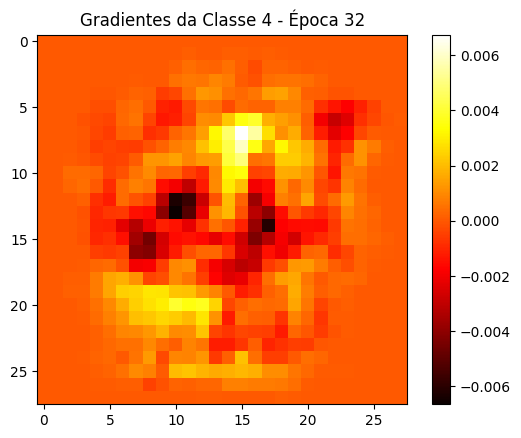

Época 33: Perda = 0.44100627303123474, Acurácia = 0.901


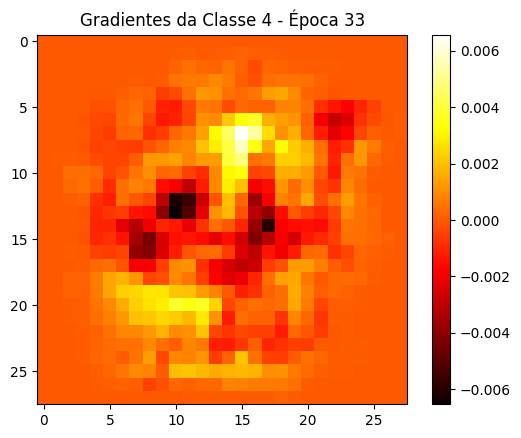

Época 34: Perda = 0.4353613257408142, Acurácia = 0.903


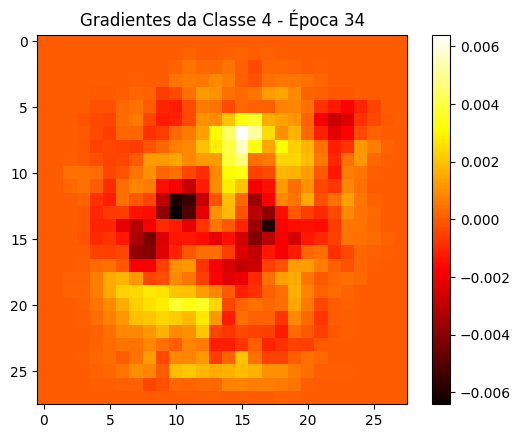

Época 35: Perda = 0.4299490451812744, Acurácia = 0.903


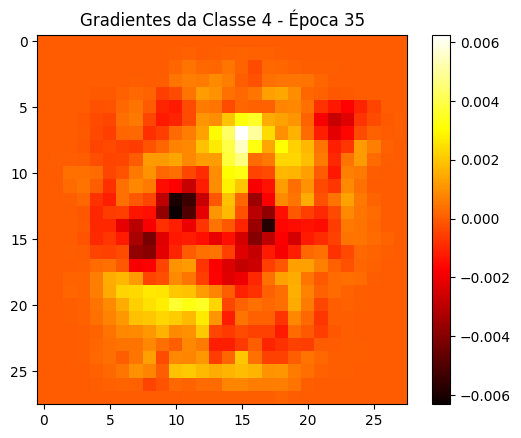

Época 36: Perda = 0.42475247383117676, Acurácia = 0.904


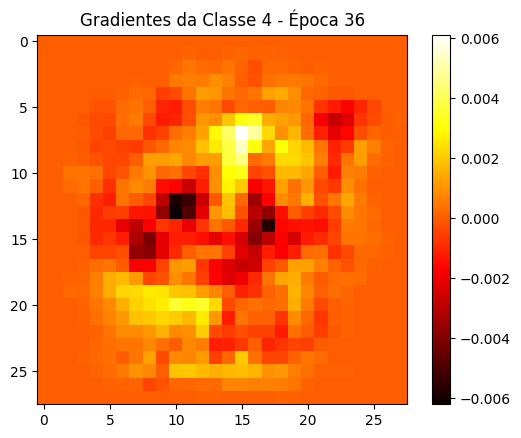

Época 37: Perda = 0.4197565019130707, Acurácia = 0.904


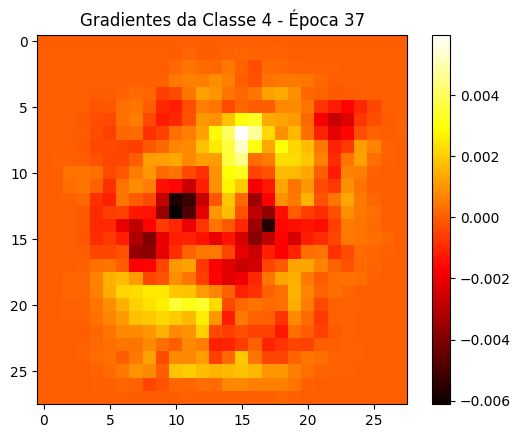

Época 38: Perda = 0.41494736075401306, Acurácia = 0.904


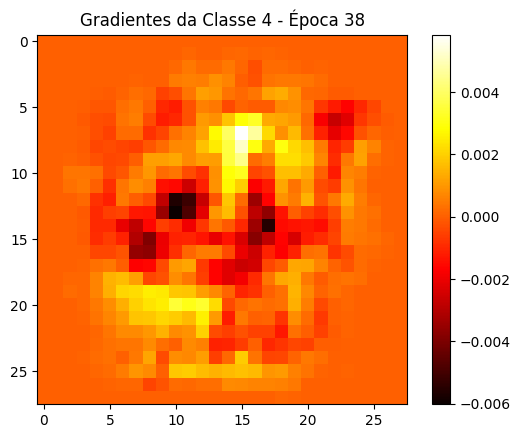

Época 39: Perda = 0.4103125333786011, Acurácia = 0.906


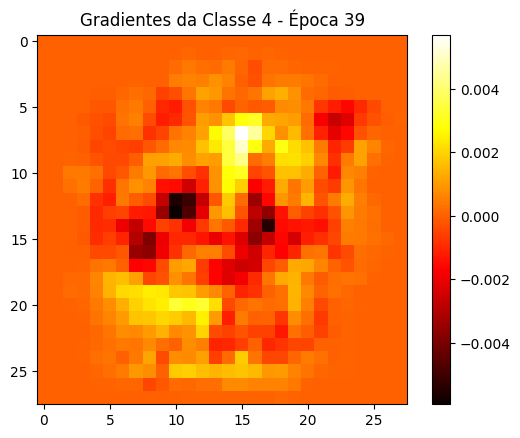

Época 40: Perda = 0.40584084391593933, Acurácia = 0.908


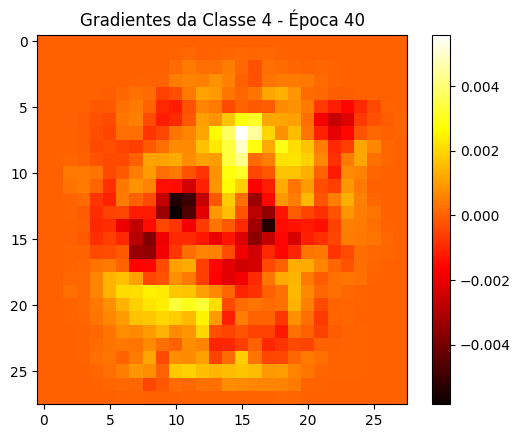

Época 41: Perda = 0.4015219509601593, Acurácia = 0.909


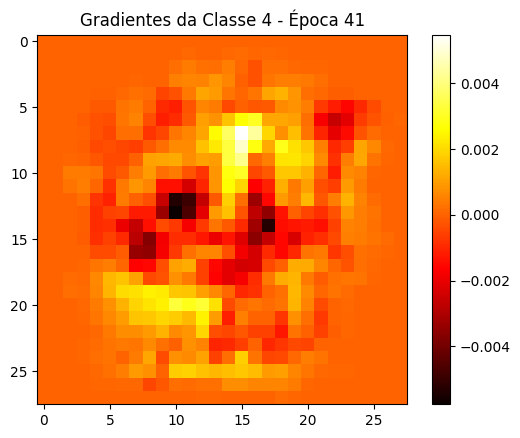

Época 42: Perda = 0.3973463773727417, Acurácia = 0.909


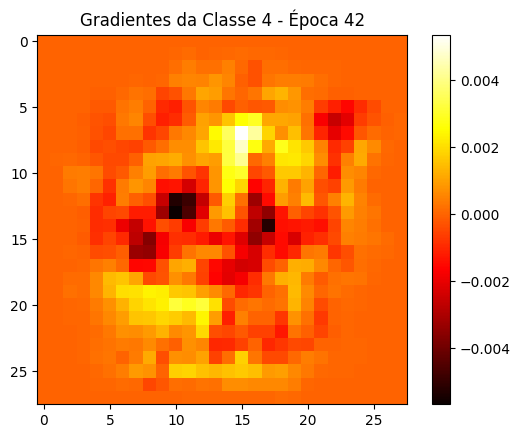

Época 43: Perda = 0.3933056890964508, Acurácia = 0.909


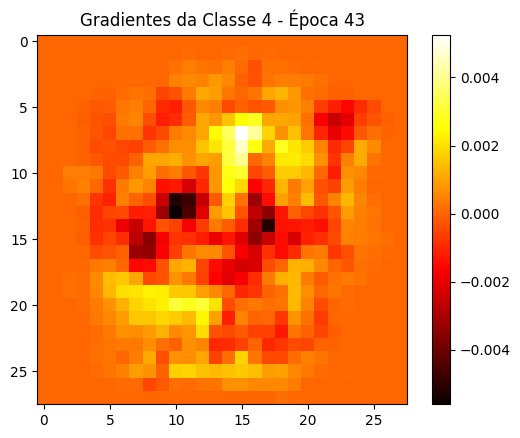

Época 44: Perda = 0.38939183950424194, Acurácia = 0.913


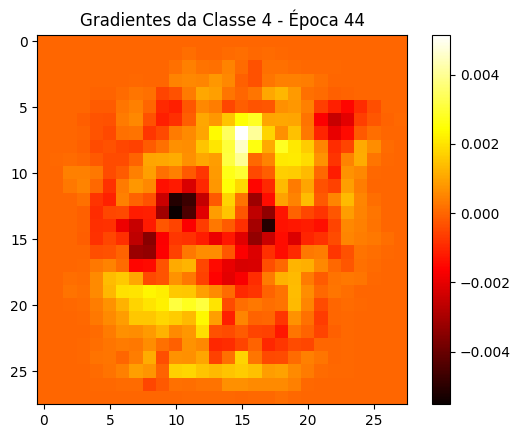

Época 45: Perda = 0.3855978846549988, Acurácia = 0.913


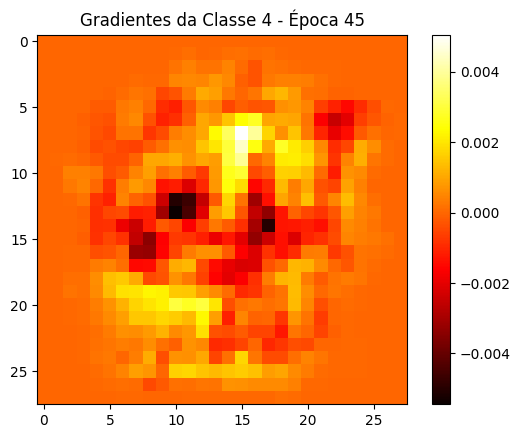

Época 46: Perda = 0.381916880607605, Acurácia = 0.914


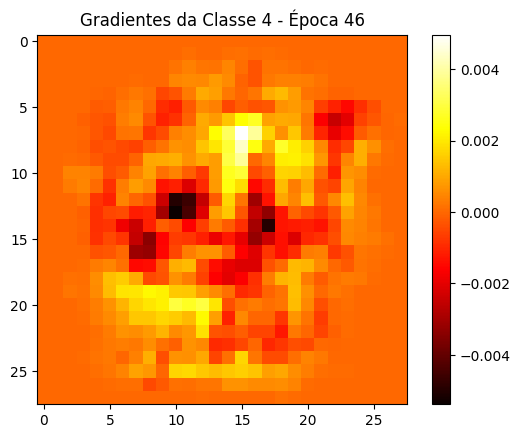

Época 47: Perda = 0.37834280729293823, Acurácia = 0.915


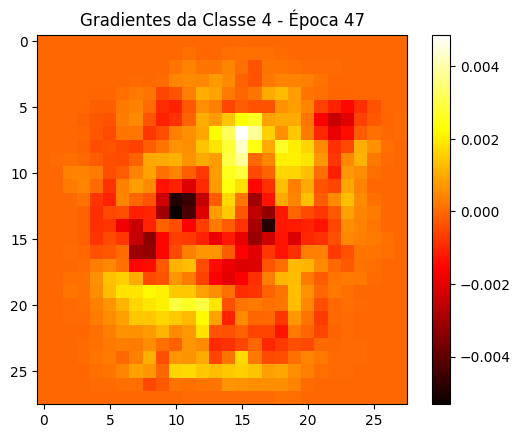

Época 48: Perda = 0.3748699724674225, Acurácia = 0.915


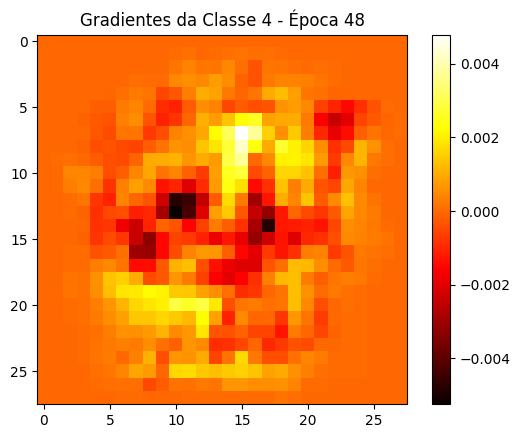

Época 49: Perda = 0.37149322032928467, Acurácia = 0.916


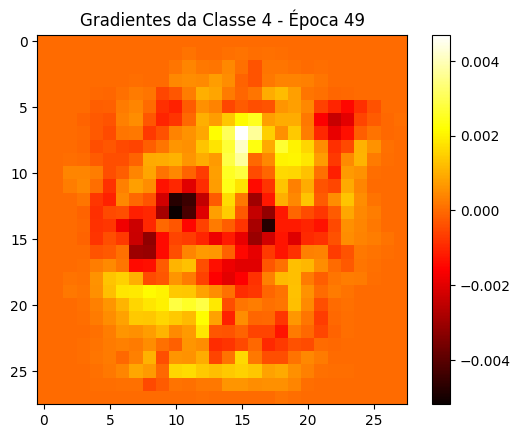

Época 50: Perda = 0.36820754408836365, Acurácia = 0.916


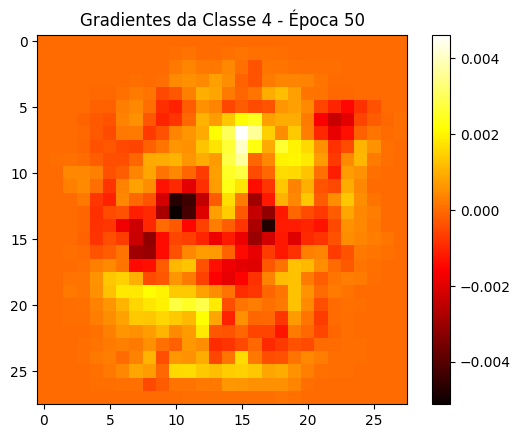

Época 51: Perda = 0.3650084137916565, Acurácia = 0.918


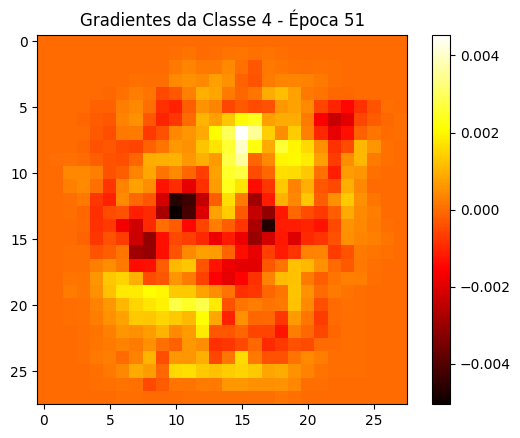

Época 52: Perda = 0.3618917763233185, Acurácia = 0.918


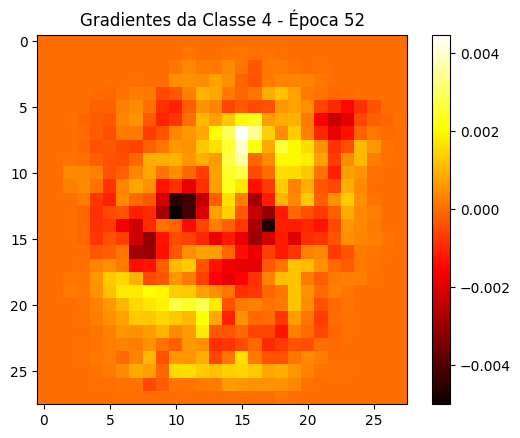

Época 53: Perda = 0.35885360836982727, Acurácia = 0.918


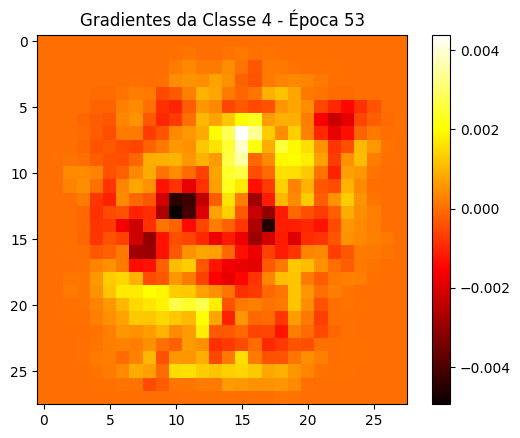

Época 54: Perda = 0.3558902442455292, Acurácia = 0.919


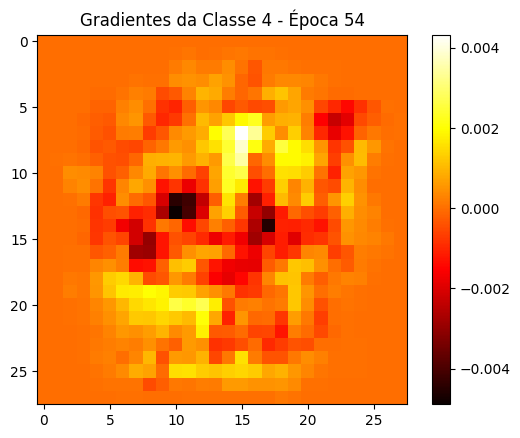

Época 55: Perda = 0.3529983460903168, Acurácia = 0.919


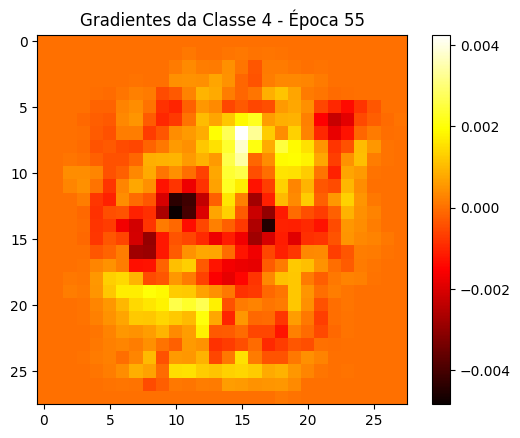

Época 56: Perda = 0.3501746654510498, Acurácia = 0.919


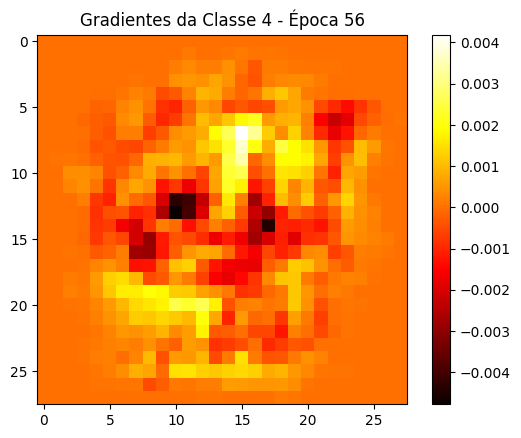

Época 57: Perda = 0.3474162220954895, Acurácia = 0.921


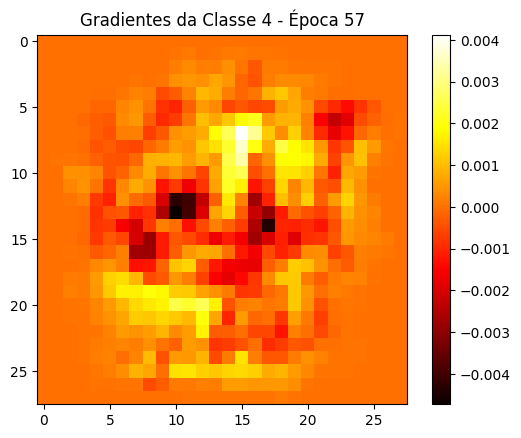

Época 58: Perda = 0.34472018480300903, Acurácia = 0.922


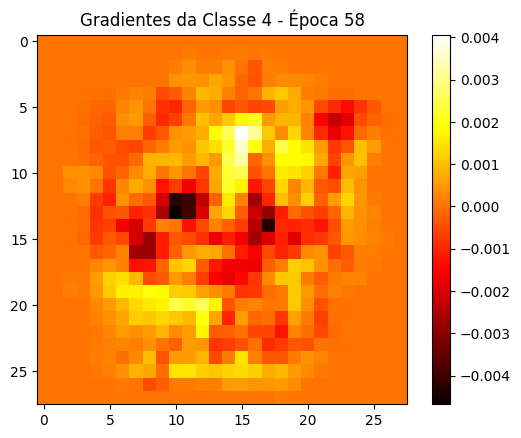

Época 59: Perda = 0.34208399057388306, Acurácia = 0.922


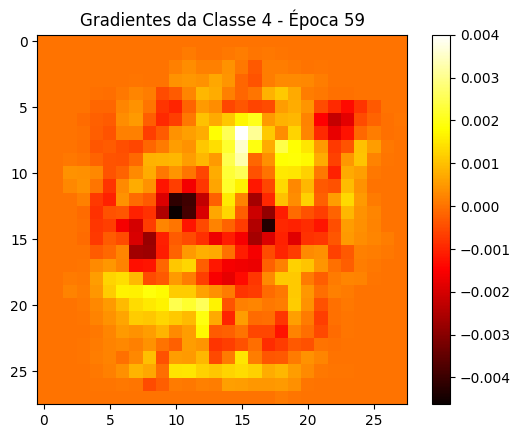

Época 60: Perda = 0.33950507640838623, Acurácia = 0.923


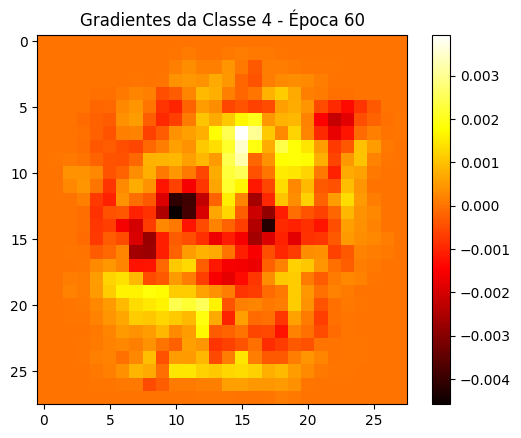

Época 61: Perda = 0.3369812071323395, Acurácia = 0.923


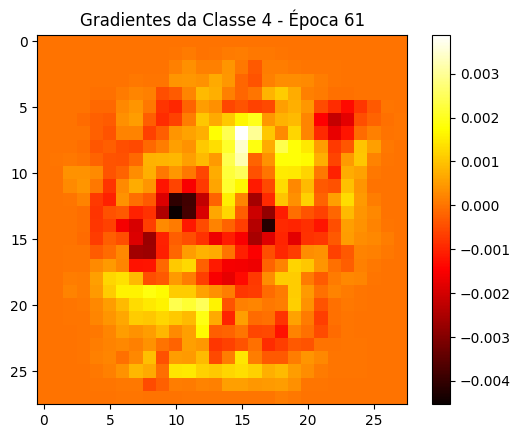

Época 62: Perda = 0.33451008796691895, Acurácia = 0.923


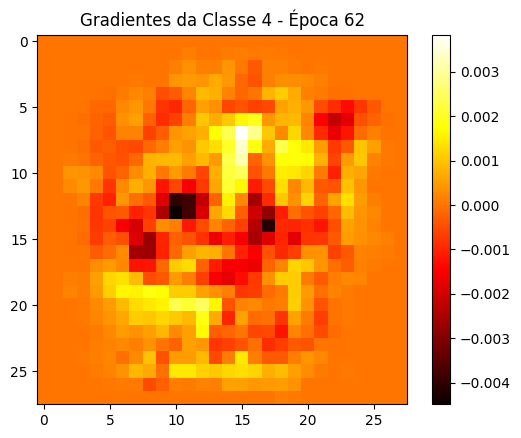

Época 63: Perda = 0.33208975195884705, Acurácia = 0.924


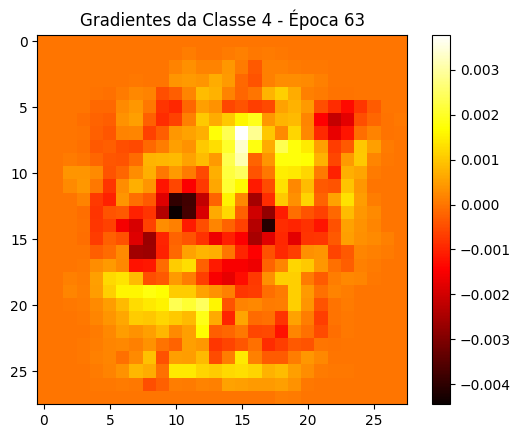

Época 64: Perda = 0.3297181725502014, Acurácia = 0.926


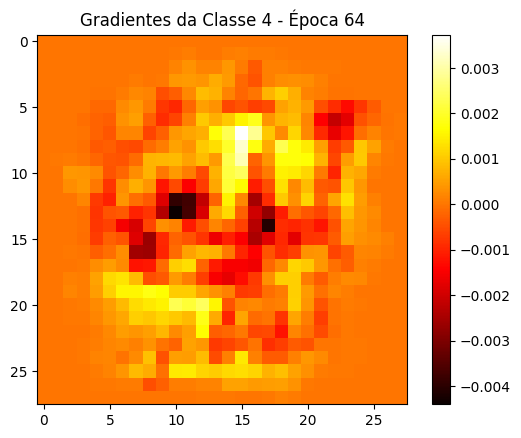

Época 65: Perda = 0.327393501996994, Acurácia = 0.928


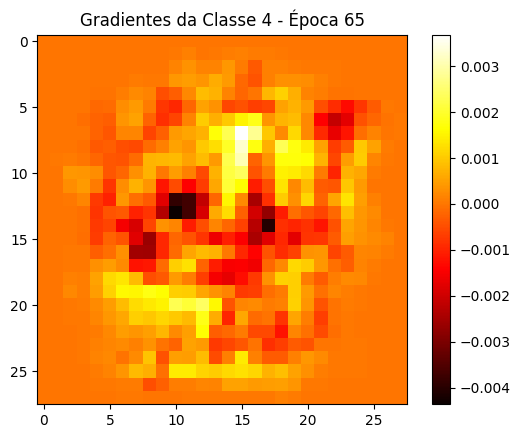

Época 66: Perda = 0.32511407136917114, Acurácia = 0.928


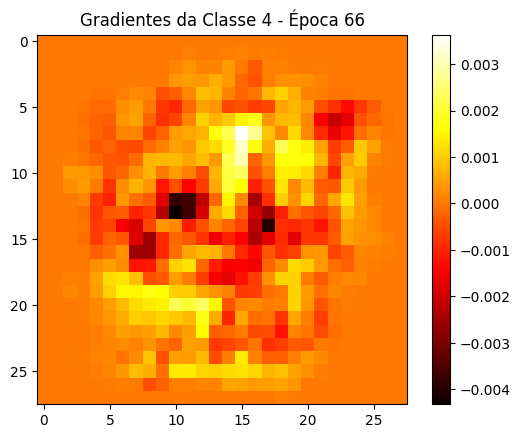

Época 67: Perda = 0.3228782117366791, Acurácia = 0.928


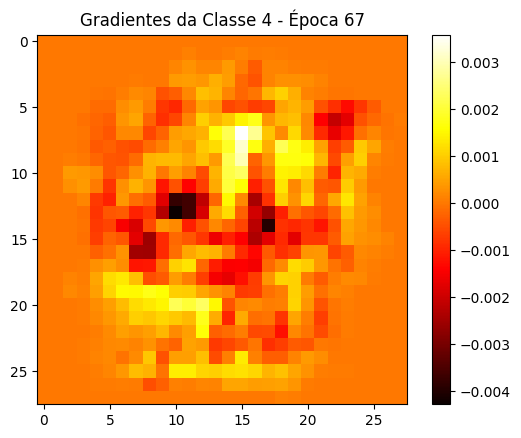

Época 68: Perda = 0.3206842839717865, Acurácia = 0.928


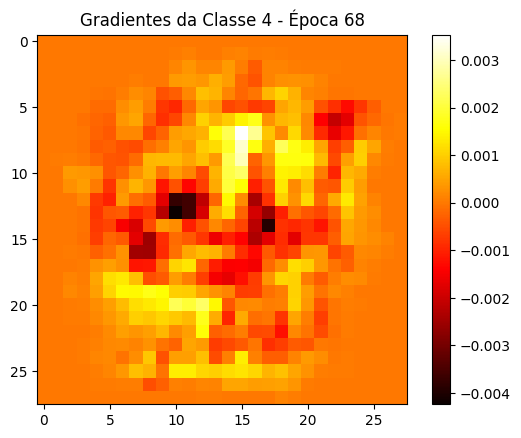

Época 69: Perda = 0.3185308277606964, Acurácia = 0.928


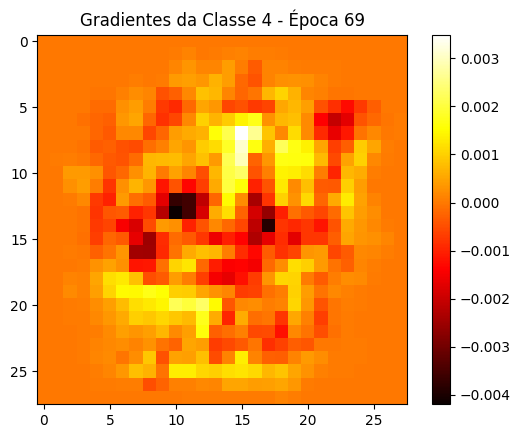

Época 70: Perda = 0.31641650199890137, Acurácia = 0.928


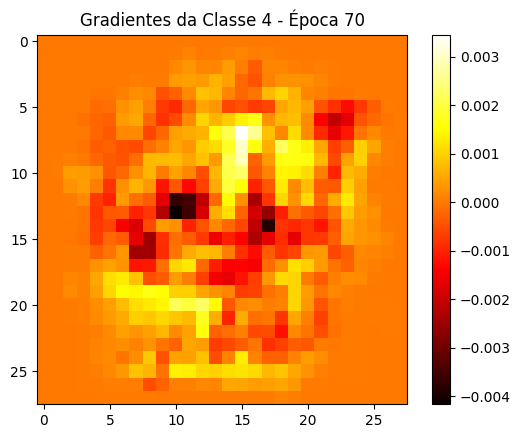

Época 71: Perda = 0.31433993577957153, Acurácia = 0.929


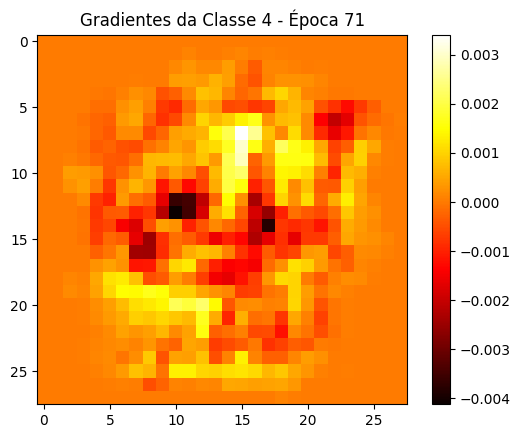

Época 72: Perda = 0.31229984760284424, Acurácia = 0.929


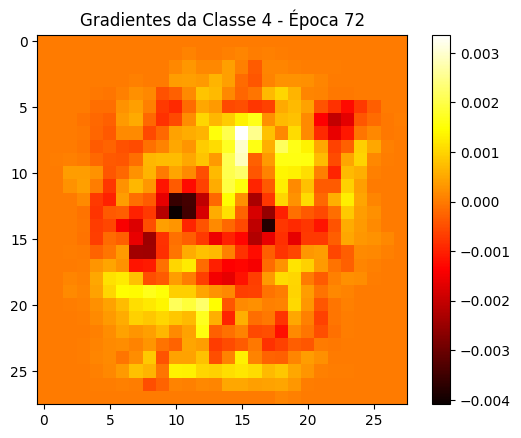

Época 73: Perda = 0.310295045375824, Acurácia = 0.93


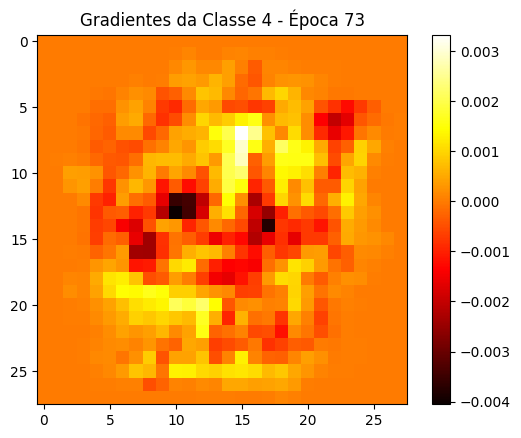

Época 74: Perda = 0.30832433700561523, Acurácia = 0.932


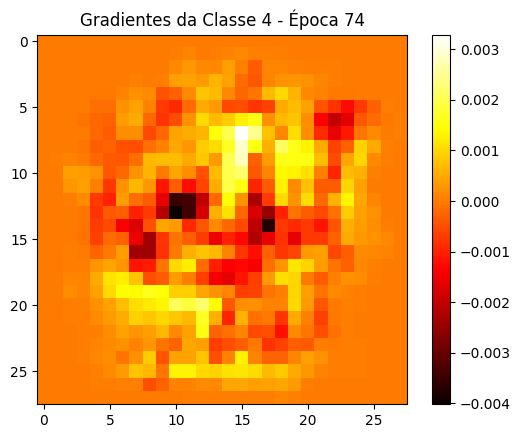

Época 75: Perda = 0.30638670921325684, Acurácia = 0.933


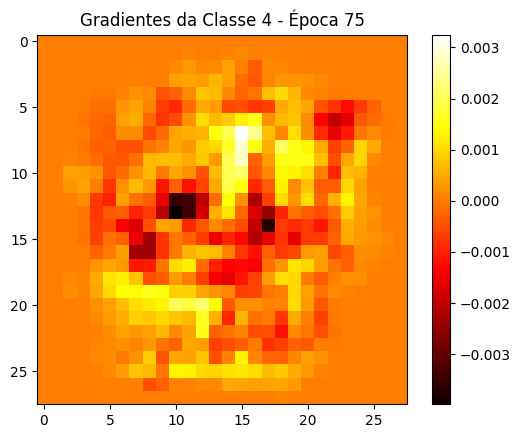

Época 76: Perda = 0.30448105931282043, Acurácia = 0.933


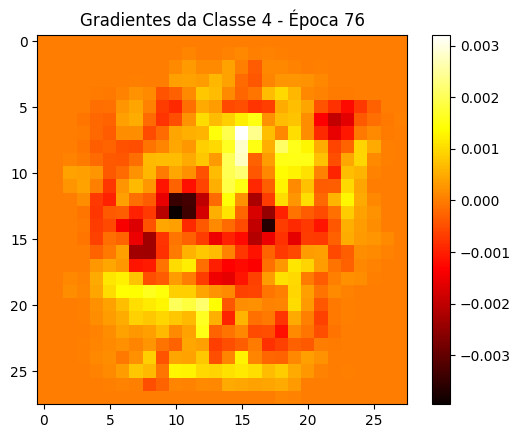

Época 77: Perda = 0.30260637402534485, Acurácia = 0.934


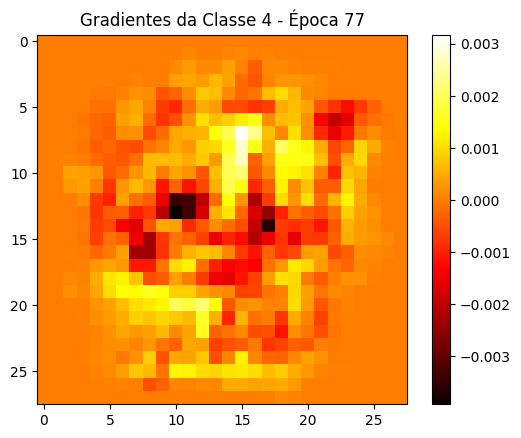

Época 78: Perda = 0.30076172947883606, Acurácia = 0.935


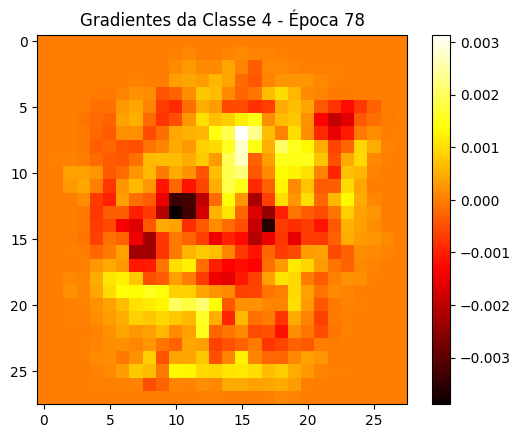

Época 79: Perda = 0.2989462912082672, Acurácia = 0.936


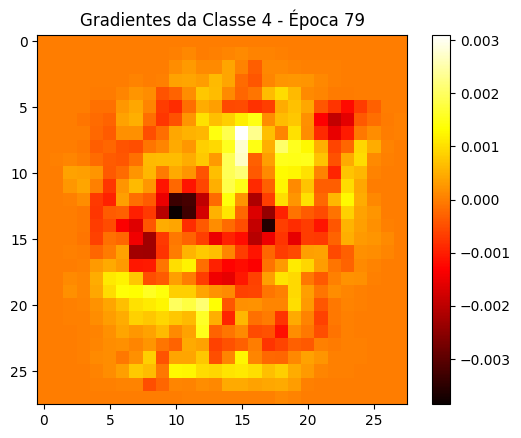

Época 80: Perda = 0.2971590459346771, Acurácia = 0.936


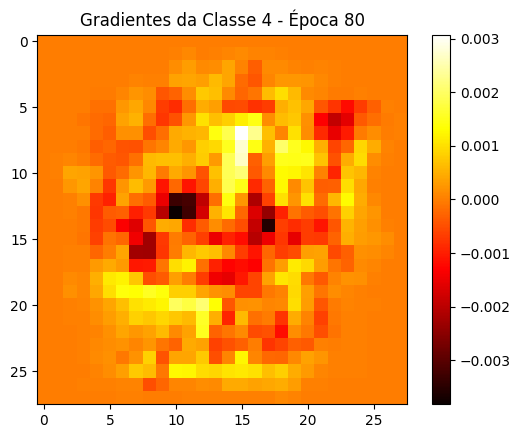

Época 81: Perda = 0.2953992486000061, Acurácia = 0.937


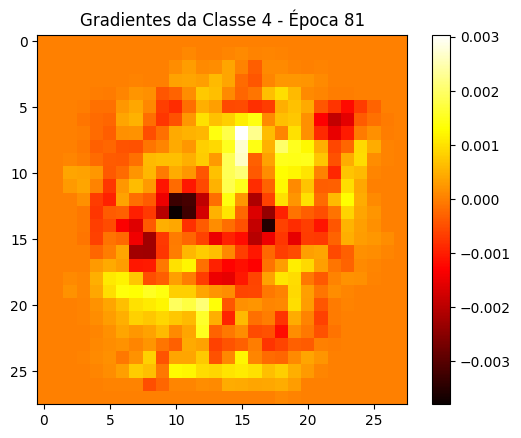

Época 82: Perda = 0.29366615414619446, Acurácia = 0.938


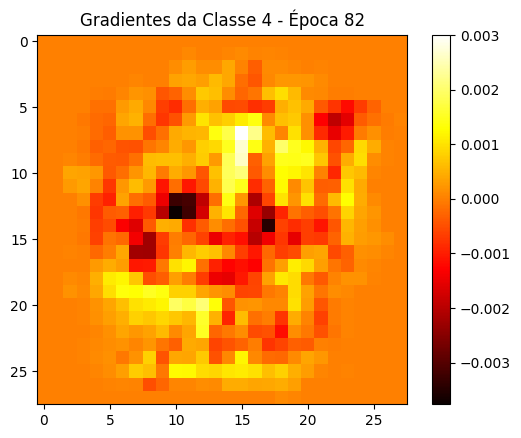

Época 83: Perda = 0.29195886850357056, Acurácia = 0.938


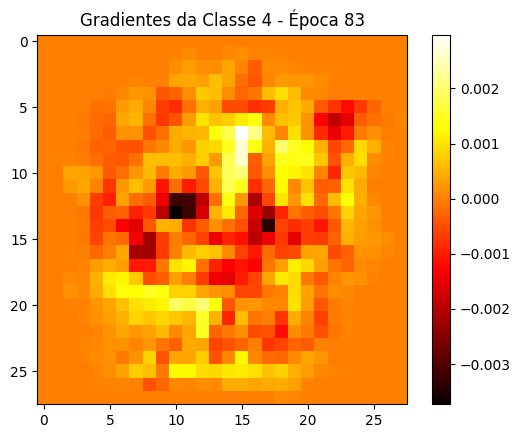

Época 84: Perda = 0.29027673602104187, Acurácia = 0.938


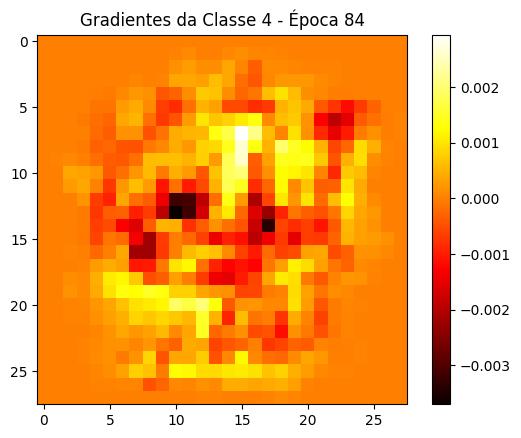

Época 85: Perda = 0.2886190712451935, Acurácia = 0.938


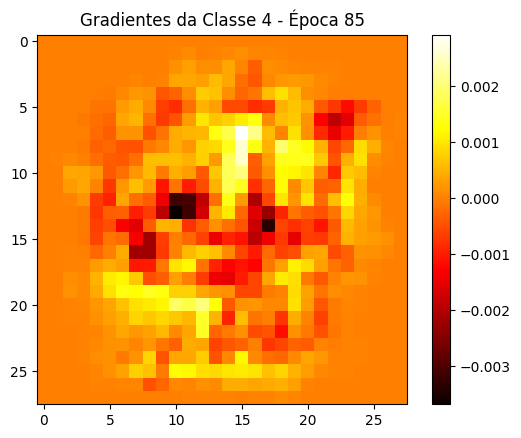

Época 86: Perda = 0.2869851887226105, Acurácia = 0.938


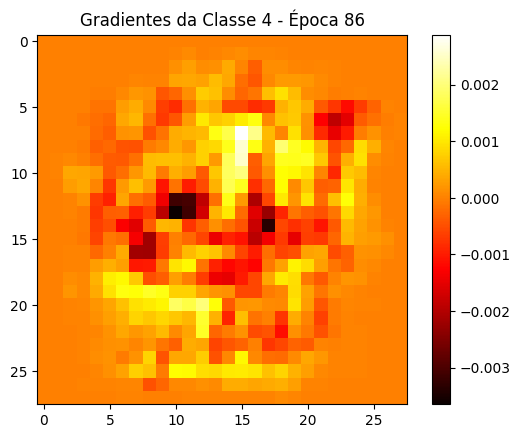

Época 87: Perda = 0.2853745222091675, Acurácia = 0.938


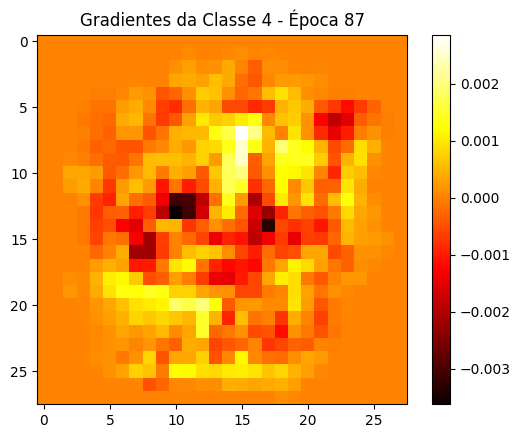

Época 88: Perda = 0.2837863266468048, Acurácia = 0.937


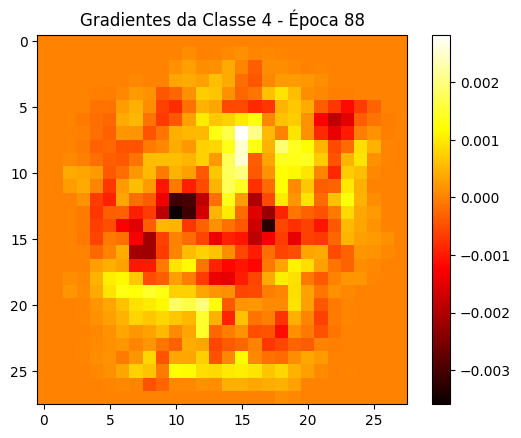

Época 89: Perda = 0.28222009539604187, Acurácia = 0.937


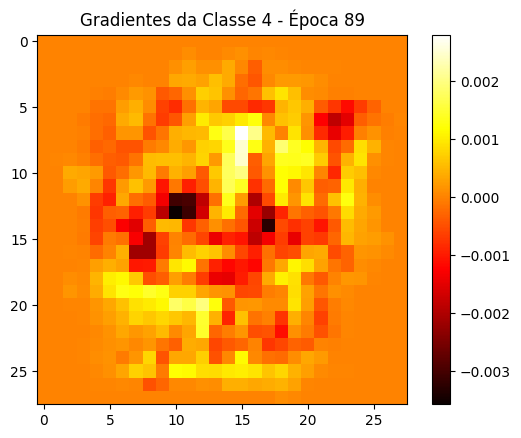

Época 90: Perda = 0.28067517280578613, Acurácia = 0.939


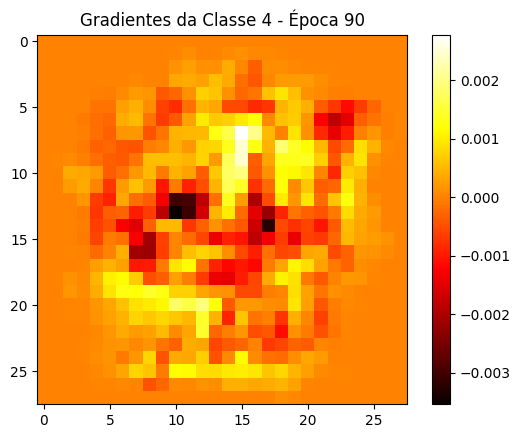

Época 91: Perda = 0.2791511118412018, Acurácia = 0.939


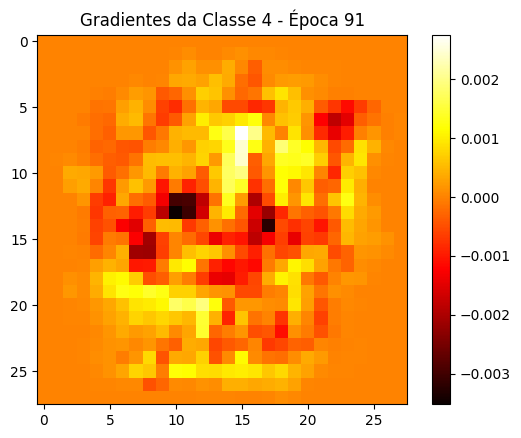

Época 92: Perda = 0.27764734625816345, Acurácia = 0.94


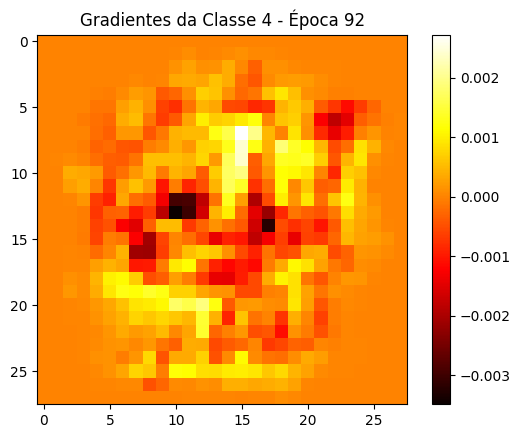

Época 93: Perda = 0.2761633098125458, Acurácia = 0.94


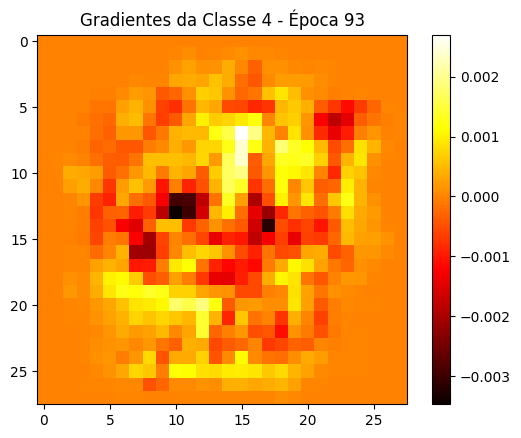

Época 94: Perda = 0.2746986448764801, Acurácia = 0.94


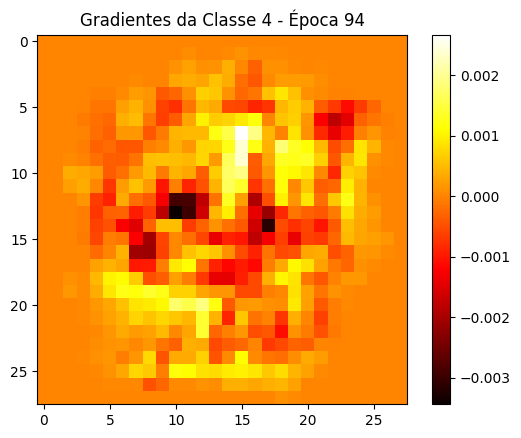

Época 95: Perda = 0.2732526957988739, Acurácia = 0.94


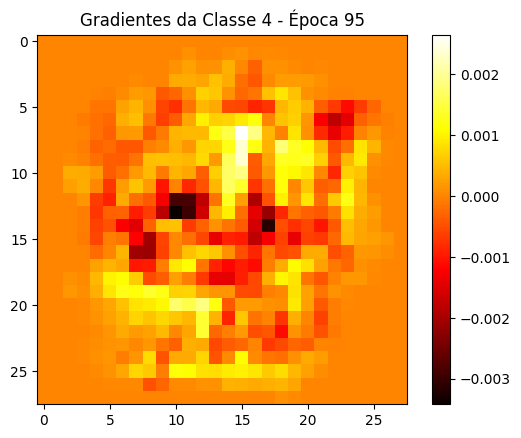

Época 96: Perda = 0.27182522416114807, Acurácia = 0.94


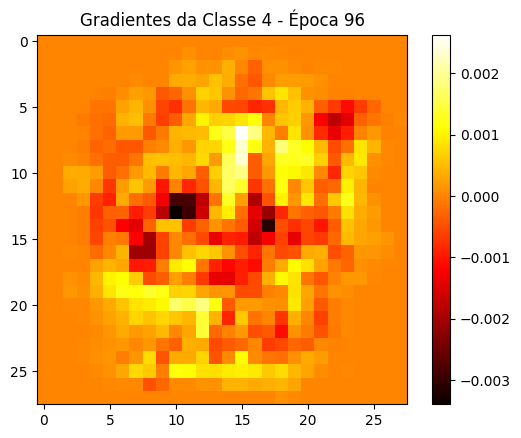

Época 97: Perda = 0.27041566371917725, Acurácia = 0.94


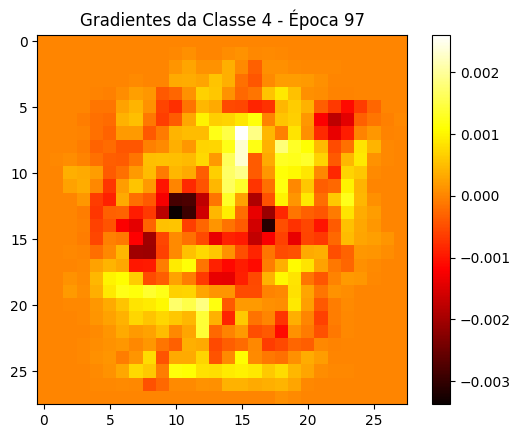

Época 98: Perda = 0.2690236270427704, Acurácia = 0.941


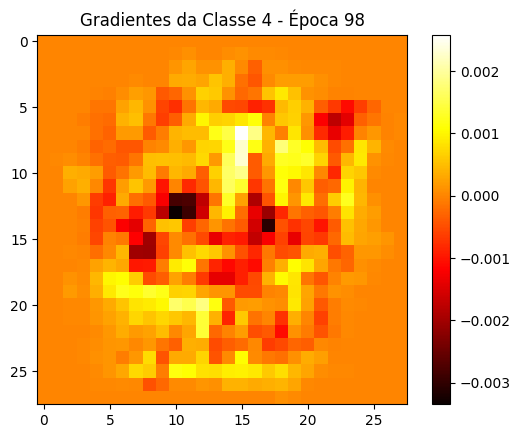

Época 99: Perda = 0.2676486670970917, Acurácia = 0.941


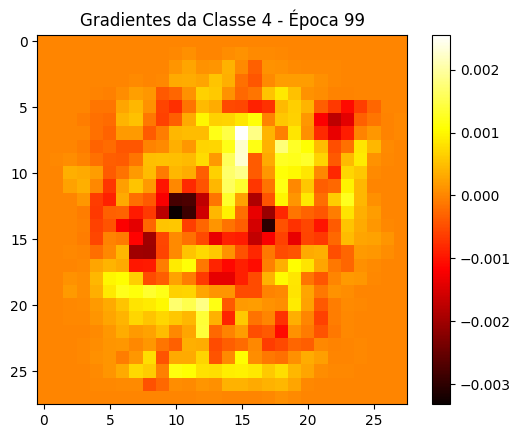

Época 100: Perda = 0.26629042625427246, Acurácia = 0.942


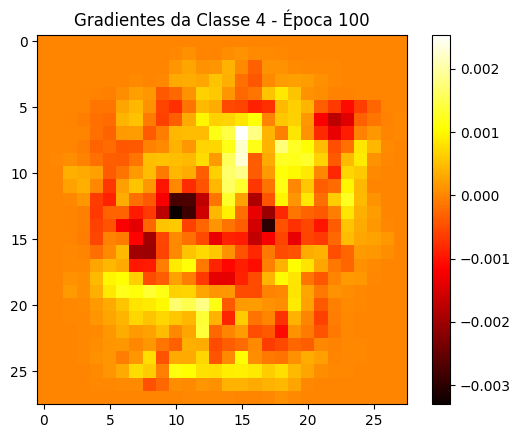

In [ ]:
import numpy
losses = []
zs = []

# ================= ADIÇÃO PARA O EXERCÍCIO 1 E 2 =================
accuracies = []  # Lista para armazenar as acurácias de cada época

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)
    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()
    accuracies.append(accuracy)

    # *** EXERCÍCIO 1: PRINT ÉPOCA, PERDA E ACURÁCIA ***
    print(f"Época {i + 1}: Perda = {loss.item()}, Acurácia = {accuracy}")

    # *** EXERCÍCIO 2: VISUALIZAÇÃO DOS GRADIENTES DA CLASSE 4 ***
    class_4_grads = model.weight.grad[4].view(28, 28).detach().numpy()
    plt.imshow(class_4_grads, cmap='hot')
    plt.title(f"Gradientes da Classe 4 - Época {i + 1}")
    plt.colorbar()
    plt.show()

In [ ]:
print('Final loss:', loss.item())

Final loss: 0.26629042625427246


### Visualizando gráfico de perda durante o treinamento

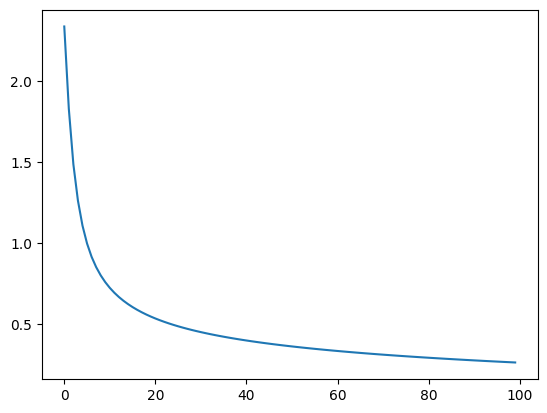

In [ ]:
plt.plot(losses)

## Avaliação

### Acurácia tanto no conjunto de treinamento como no conjunto de testes

In [ ]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

Accuracy: 0.942


### Matriz de confusão com dados de treinamento e teste

In [ ]:
print('Matriz de confusão:')
pd.crosstab(y_pred.numpy(), y_train.numpy())

Matriz de confusão:


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,96,0,1,0,0,0,1,0,0,2
1,0,110,2,0,0,0,2,3,1,0
2,0,1,90,1,0,1,1,1,1,1
3,0,0,0,88,0,2,0,0,0,0
4,0,0,1,0,102,2,0,1,0,3
5,0,2,0,1,0,82,0,0,2,1
6,1,0,1,1,2,2,90,0,0,0
7,0,1,1,1,0,0,0,111,0,3
8,0,2,2,0,0,1,0,0,83,0


## Visualizando a matriz de pesos treinados

Observe que a matriz de peso treinado para cada classe mostra a importância dos pesos associados aos caracteres de cada classe.

weights: torch.Size([10, 784])
bias:    torch.Size([10])


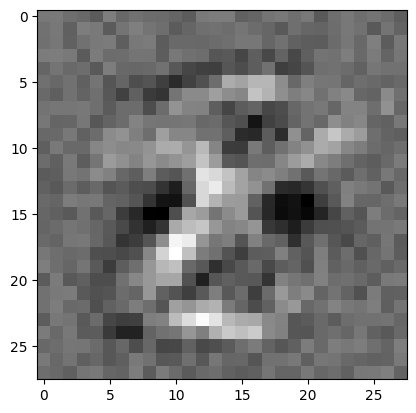

In [ ]:
weights = model.state_dict()['weight']
print('weights:', weights.shape)

bias = model.state_dict()['bias']
print('bias:   ', bias.shape)

# Visualizando pesos da classe 3
plt.imshow(weights[8, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

### Visualizando os pesos de todas as classes

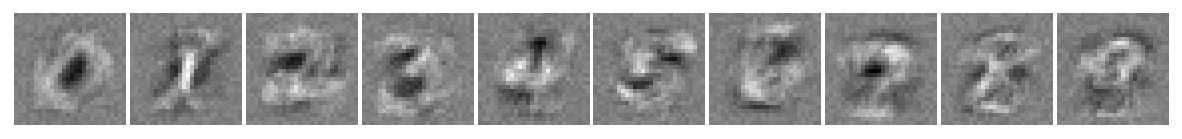

In [ ]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

### Diagrama da regressão softmax com visualização dos pesos W

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmaxArgmaxNMIST.png)

# Atividades

## Exercícios

- 1) Insira código no laço do treinamento para que no final de cada época,
     seja impresso: o número da época e a perda e a acurácia

- 2) Insira código no laço do treinamento para visualização dos valores dos gradientes referentes à classe do dígito 4, no final de cada época.

<details>
<summary>Mostrar Resultado</summary>

```python
losses = []
import numpy

import numpy
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)
    
    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    
    _, predicts = torch.max(outputs, 1)
    
    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()
    
    print('Epoch[{}/{}], loss: {:.6f}, acc: {:.6f}'
              .format(i+1, epochs, loss.data, accuracy))
    
    weights = model.state_dict()['weight']
    print('weights:', weights.shape)

    bias = model.state_dict()['bias']
    print('bias:   ', bias.shape)

    # Visualizando pesos da classe 3
    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()
```

</details>

## Perguntas

1. Qual é o shape da matriz de entrada na rede?
[1000, 28, 28]
2. Qual é o shape da saída da rede?
[1000, 10]
3. Qual é o número total de parâmetros da rede, incluindo o bias?
28x28 + 10 = 794

# Aprendizados


- Uso do torchvision.utils.make_grid para mostrar imagens e pesos aprendidos.
- Análise dos gradientes dos pesos para entender como o modelo está aprendendo e ajustando os pesos.